In [ ]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


# Initial 1D comparison

In [1]:
ds_1D = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/m4ab-tune_albedo_1D_sep_add_1_increased_density_reduced_density_full_power_corrected_conditions')

NameError: name 'xh' is not defined

In [ ]:
# Load the case

db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m4ab-tune_albedo_new_branch', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/grids')

case = db.load_case_2D("m4ab-tune_albedo_new_branch", use_squash = True, verbose = True)

- Reading case m4ab-tune_albedo_new_branch
-----------------------
- Looking for squash file
- Squash file found. squash date 01/12/2025, 17:02:45, dmp file date 01/12/2025, 16:40:35

Unnormalising with xHermes


In [ ]:
params = ['Te', 'Td+', 'Ne', 'Nd', 'Rc']

plot_profiles(ds_1D, params)




array([<Axes: xlabel='S$_\\parallel$ (m)', ylabel='Te (eV)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Td+ (eV)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Ne (m^-3)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Nd (m^-3)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Rc (W / m^3)'>,
       <Axes: >], dtype=object)

final time step: 723500000.0 (ms) / 723500.0(s)


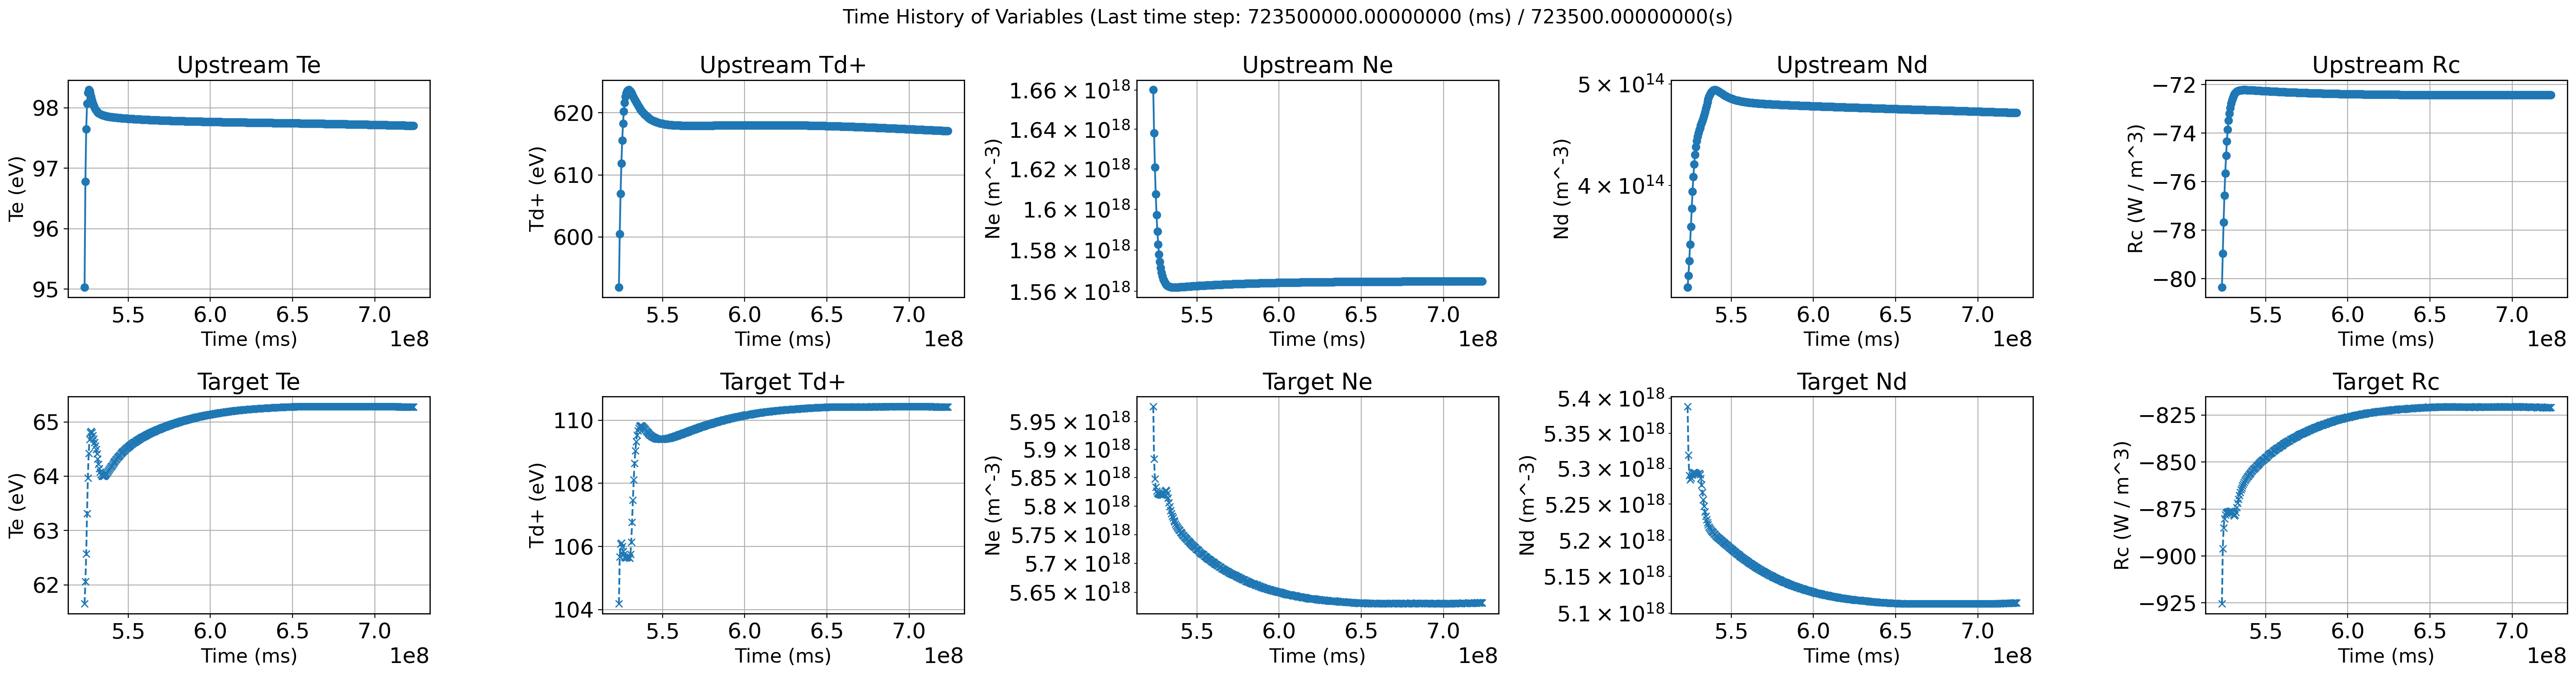

In [ ]:
plot_time_history(ds_1D, params)

1 None
[ 0.          0.20028438  0.58799559  1.04886504  1.65360604  2.40325645
  3.31410701  4.37809816  5.58576714  7.08138528 10.12887192 12.78112597
 13.76749653 14.42702217 14.9159723  15.28920283 15.58237336 15.8278471
 16.0593457  16.31559358 16.63256891 17.06016419 17.60897366 18.30654625
 19.15710201 20.13003345 21.16031114 22.16976446 23.08632297 23.85044415
 24.41482754]
xpoint location 12.781125972603952
upstream density 1.5649191736428076e+18


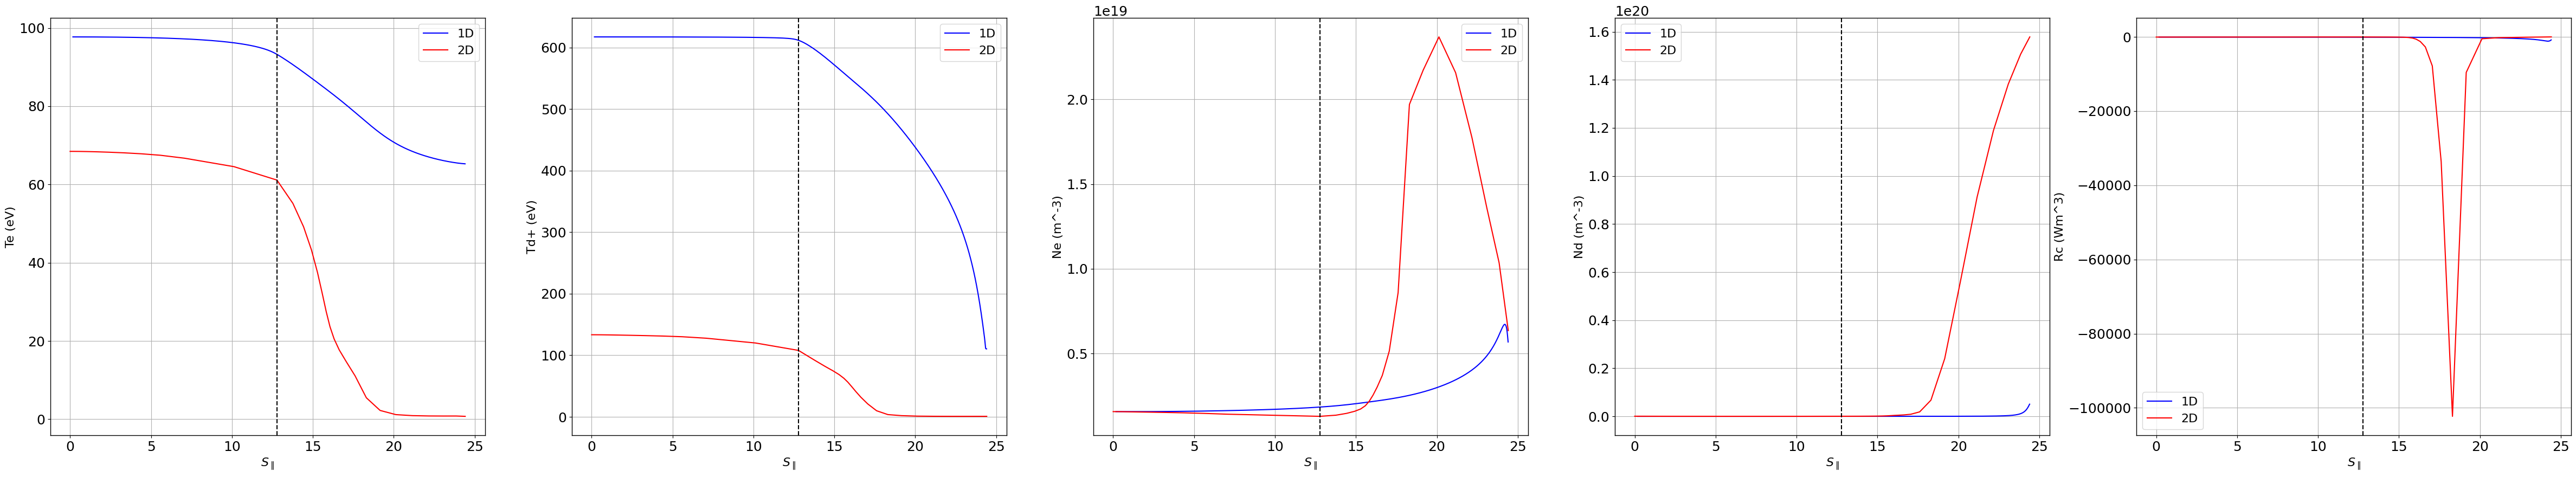

In [ ]:
units = ['eV', 'eV', 'm^-3', 'm^-3', 'Wm^3']
params = ['Te', 'Td+', 'Ne', 'Nd', 'Rc']

fig, ax = plt.subplots(1, len(params), figsize=(len(params*12), 10))

for i, param in enumerate(params):
    y = ds_1D['y'].values[1:-1]
    param_no_guard = replace_guards(np.ravel(ds_1D[param].isel(t=-1).values))
    ax[i].plot(y,param_no_guard, label='1D', color = 'blue')


profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1)

print(profile['Spar'].values)

xpoint_location = profile['R'].idxmin()
print('xpoint location', profile['Spar'][xpoint_location])

upstream_density = profile['Ne'][0]
print('upstream density', upstream_density)


for i, param in enumerate(params):
    ax[i].plot(profile['Spar'], profile[param], color = 'red', label = '2D')
    ax[i].set_xlabel(r'$S_{\parallel}$')
    ax[i].set_ylabel(f'{param} ({units[i]})')

for ax in ax:
    ax.legend()
    ax.axvline(x = profile['Spar'][xpoint_location], color = 'black', linestyle = '--', label = 'X-point')




    

# Multiple sep dist

0
1
2
3
4
0 None
[ 0.          0.20018507  0.58794447  1.04874846  1.65286147  2.40139388
  3.3101283   4.37094086  5.57692457  7.07675616 10.51085146 13.55861037
 14.54960373 15.21003584 15.69952912 16.07333029 16.36711334 16.6131752
 16.84522477 17.10212623 17.42039876 17.84976253 18.40067705 19.10071209
 19.9539656  20.92913405 21.96140216 22.97360887 23.89419962 24.66307028
 25.23191161]
xpoint location 13.558610373824536
upstream density 1.5816238592348372e+18
0
1
2
3
4
1 None
[ 0.          0.20028438  0.58799559  1.04886504  1.65360604  2.40325645
  3.31410701  4.37809816  5.58576714  7.08138528 10.12887192 12.78112597
 13.76749653 14.42702217 14.9159723  15.28920283 15.58237336 15.8278471
 16.0593457  16.31559358 16.63256891 17.06016419 17.60897366 18.30654625
 19.15710201 20.13003345 21.16031114 22.16976446 23.08632297 23.85044415
 24.41482754]
xpoint location 12.781125972603952
upstream density 1.5649191736428076e+18
0
1
2
3
4
2 None
[ 0.          0.20039032  0.58804975  1.048

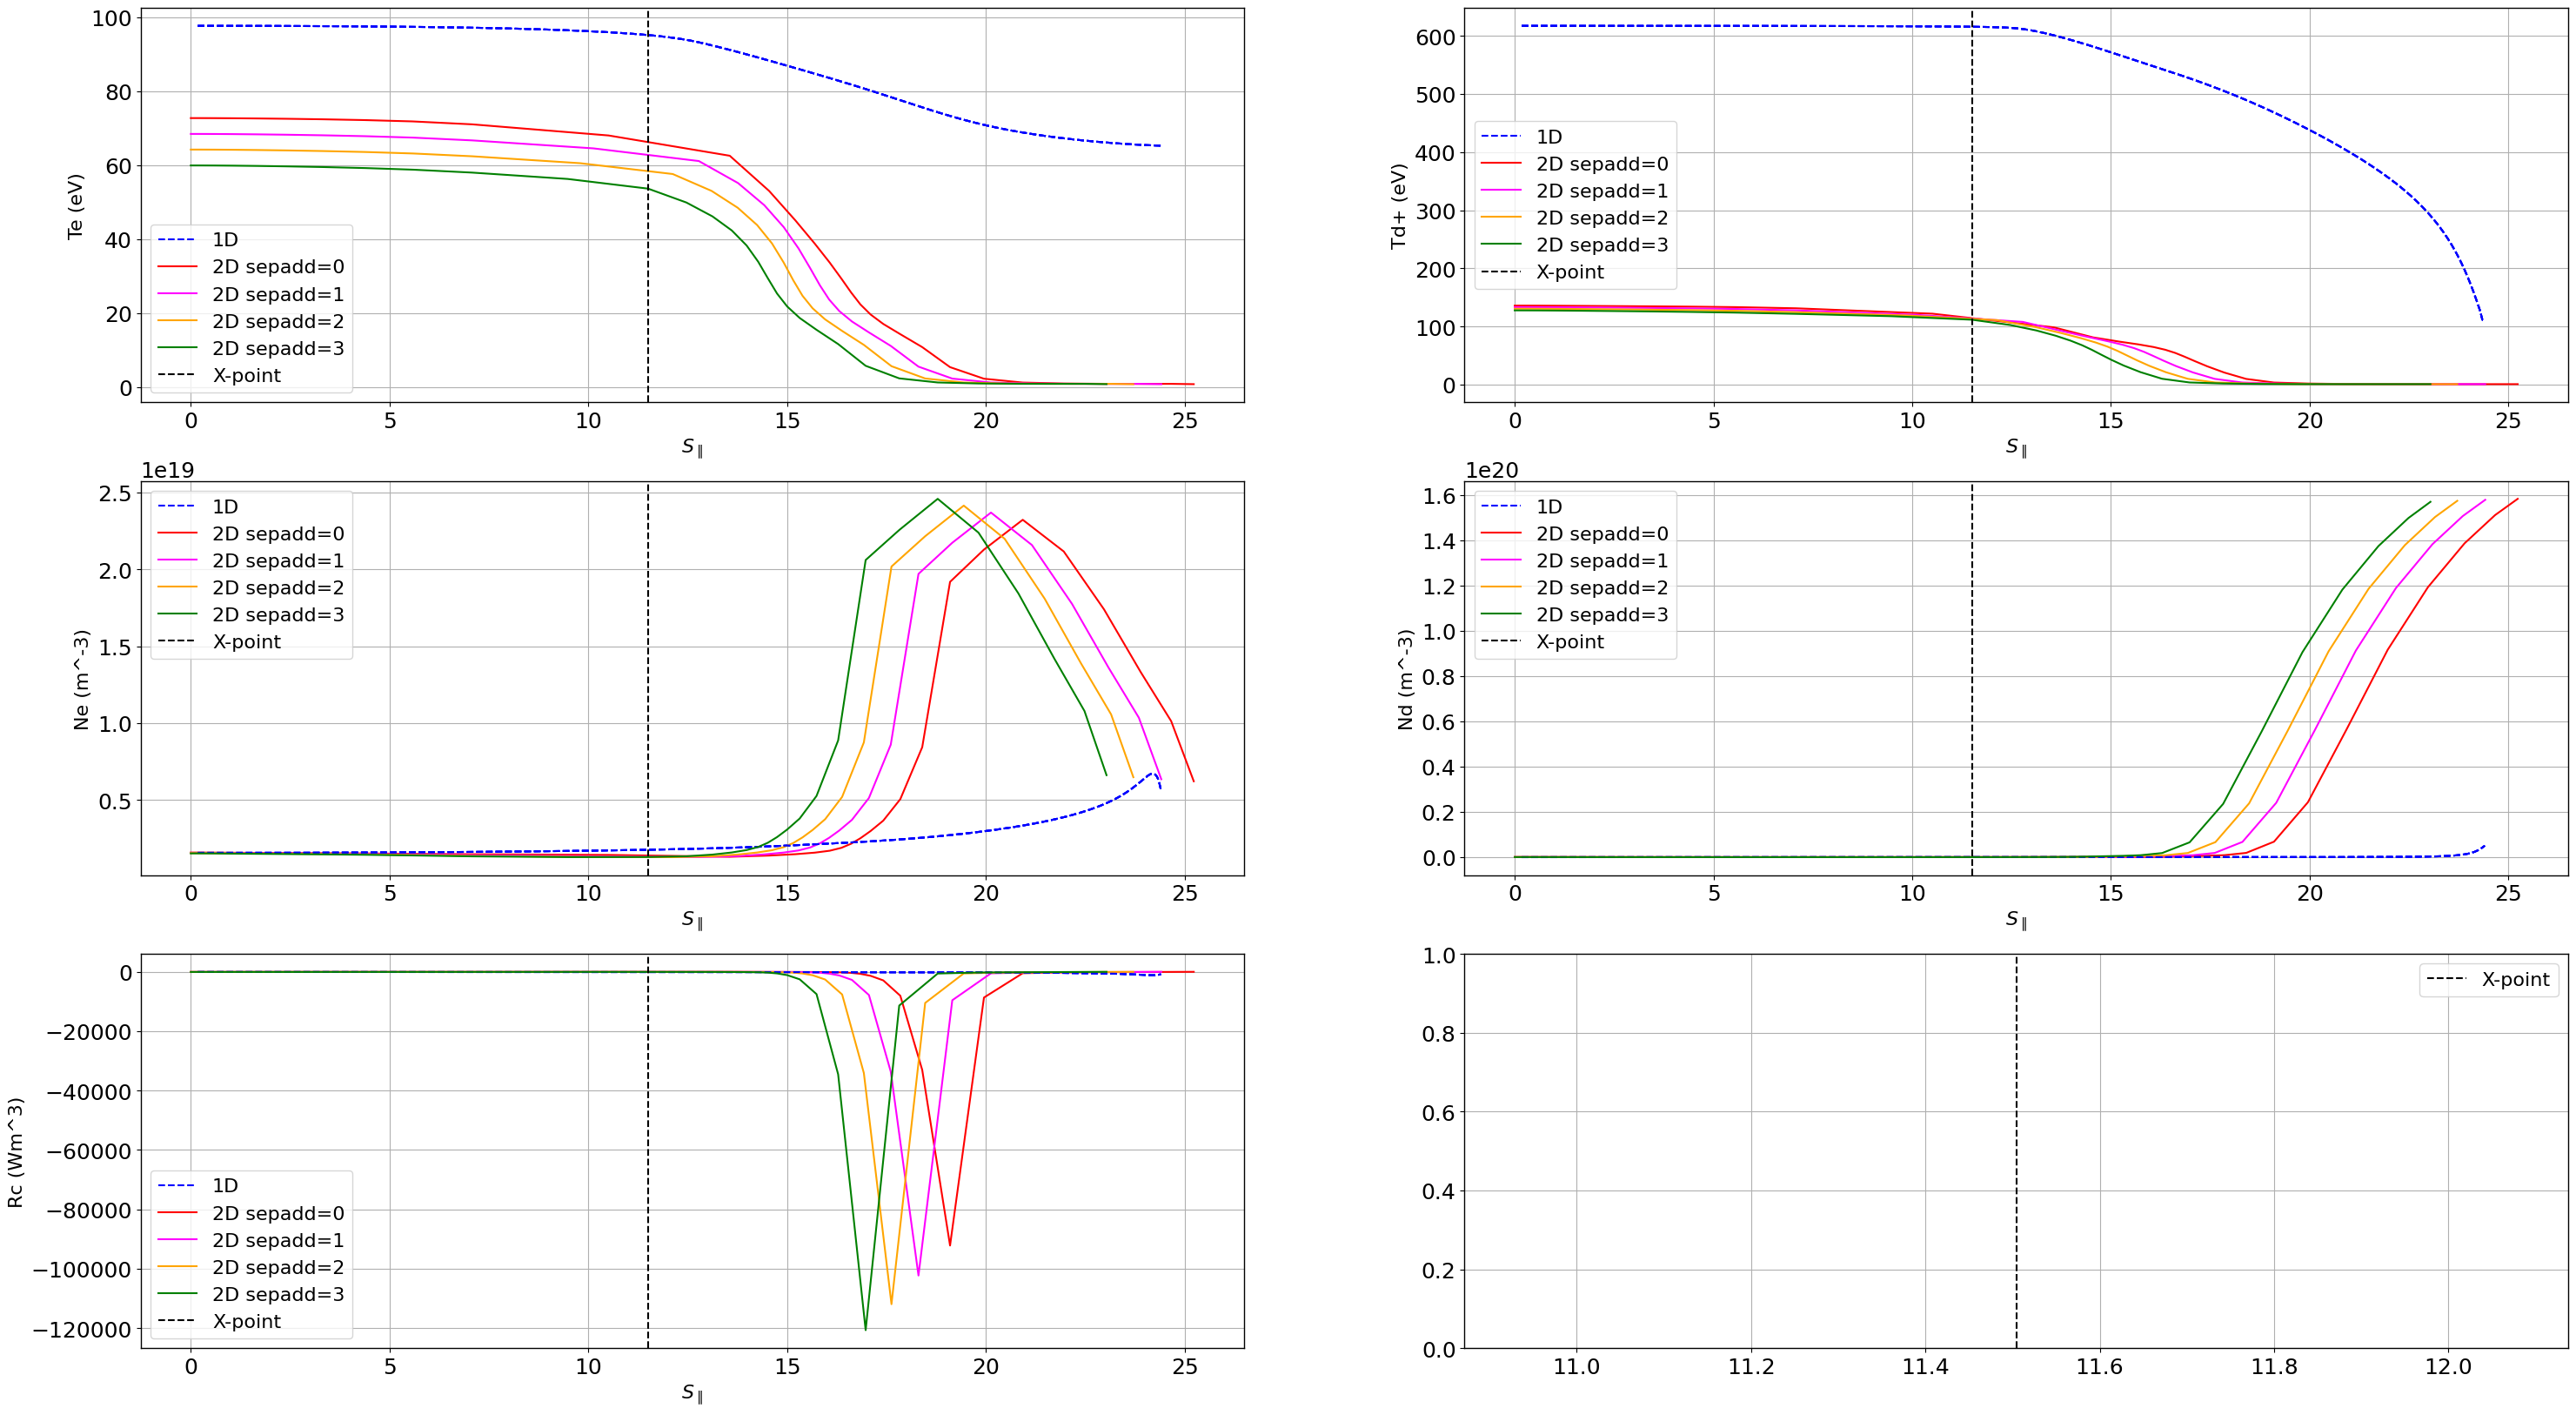

In [ ]:
units = ['eV', 'eV', 'm^-3', 'm^-3', 'Wm^3']
params = ['Te', 'Td+', 'Ne', 'Nd', 'Rc']
line_colour = ['red', 'magenta', 'orange', 'green']

fig, ax = plt.subplots(3, 2, figsize=(3*12, 2*10), squeeze=False)
ax = ax.flatten()

for j in range(0,4):
    for i, param in enumerate(params):
        print(i)
        y = ds_1D['y'].values[1:-1]
        param_no_guard = replace_guards(np.ravel(ds_1D[param].isel(t=-1).values))
        if j == 0:
            ax[i].plot(y, param_no_guard, label='1D', color='blue', linestyle='--')
        else:
            ax[i].plot(y, param_no_guard, color='blue', linestyle='--')


    profile = get_1d_poloidal_data(case.ds.isel(t=-1), params=params, region=('outer_lower'), sepadd=j)

    print(profile['Spar'].values)

    xpoint_location = profile['R'].idxmin()
    print('xpoint location', profile['Spar'][xpoint_location])

    upstream_density = profile['Ne'][0]
    print('upstream density', upstream_density)


    for i, param in enumerate(params):
        ax[i].plot(profile['Spar'], profile[param], color=line_colour[j], label=f'2D sepadd={j}')
        ax[i].set_xlabel(r'$S_{\parallel}$')
        ax[i].set_ylabel(f'{param} ({units[i]})')

for a in ax:
    a.axvline(x=profile['Spar'][xpoint_location], color='black', linestyle='--', label='X-point')
for a in ax:
    a.legend()


#### Q_para_multi_sep_add


0 None
q_cond_e =  43.626575030240836 MW
1 None
q_cond_e =  31.39955266095364 MW
2 None
q_cond_e =  24.176733019783306 MW
3 None
q_cond_e =  18.774035723763554 MW


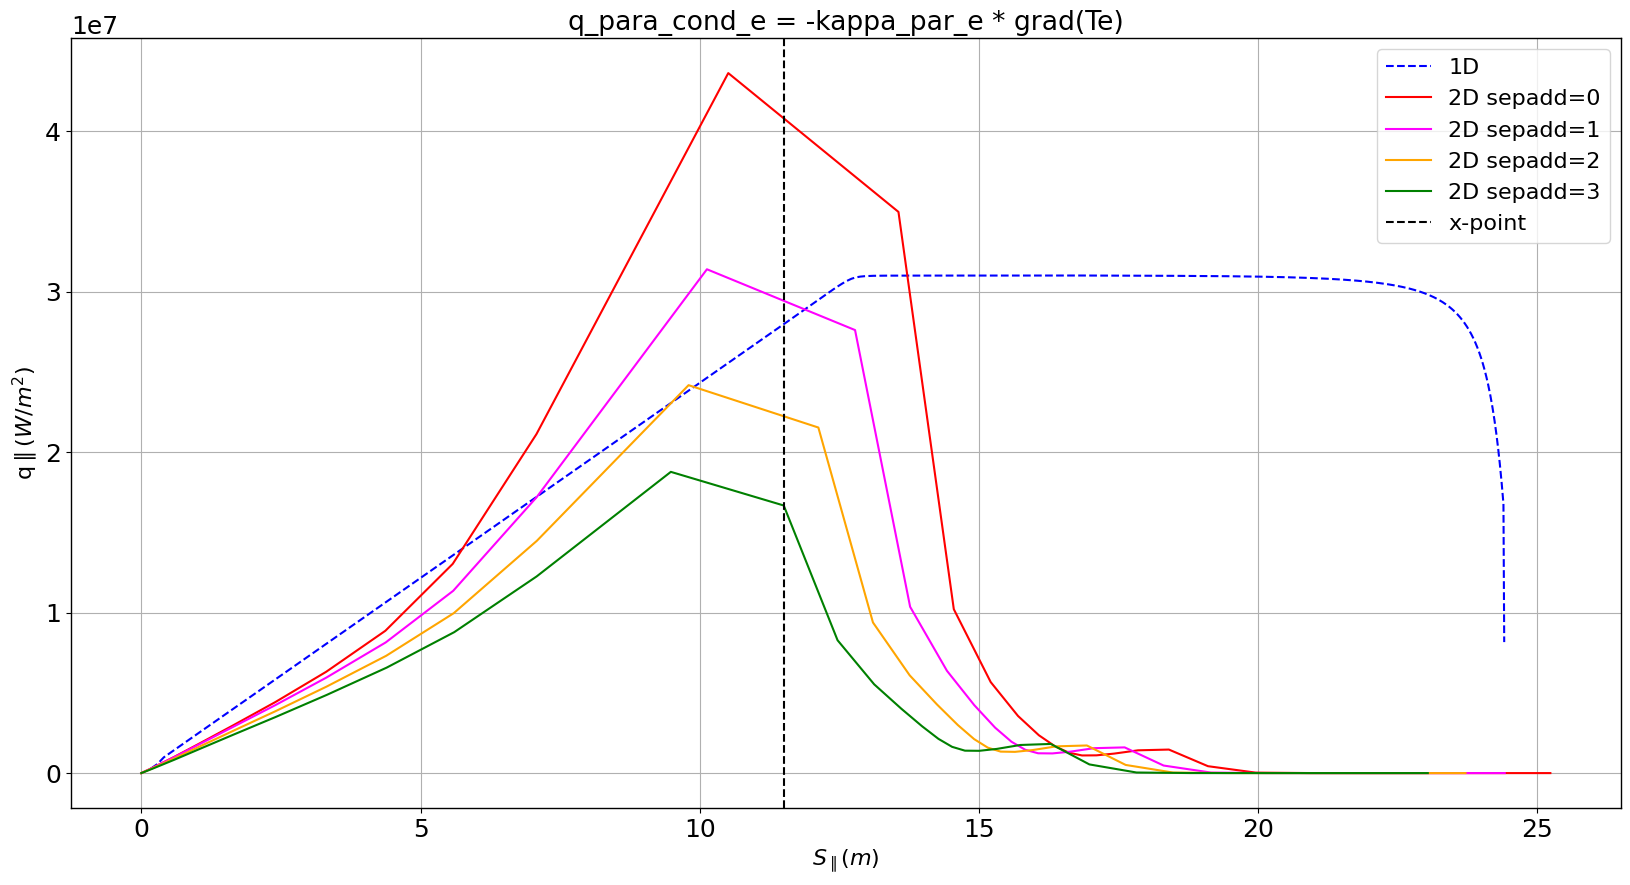

In [ ]:
kappa_e = replace_guards(np.ravel(ds_1D['kappa_par_e'].isel(t=-1).values))
grad_Te = np.gradient(replace_guards(np.ravel(ds_1D['Te'].isel(t=-1).values)), ds_1D['y'].values[1:-1])
line_colour = ['red', 'magenta', 'orange', 'green']


fig, ax = plt.subplots(1, 1, figsize = (20, 10))
q_1D = -kappa_e*grad_Te

ax.plot(ds_1D['y'].values[1:-1], q_1D, label = '1D', color = 'blue', linestyle = '--')
for j in range(0,4):
    params = ['kappa_par_e', 'Te']
    # get 1D slice
    prof_2D = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = j) 

    prof_2D['q_e_para_external'] = - prof_2D['kappa_par_e'] * np.gradient(prof_2D['Te'])

    xpoint_location = prof_2D['R'].idxmin()

    print('q_cond_e = ', np.max(prof_2D['q_e_para_external']*1e-6), 'MW')
    # plot


    # ax2 = ax.twinx()
    ax.plot(prof_2D['Spar'], prof_2D['q_e_para_external'], label = f'2D sepadd={j}', color = line_colour[j])

# ax2.plot(prof_2D['Spar'], prof_2D['q_e_para_external'], label = 'external calc')
ax.set_xlabel(r'$S_{\parallel} (m)$')
ax.set_ylabel(fr'q$\parallel (W/m^2)$') 
ax.axvline(x = prof_2D['Spar'][xpoint_location], color = 'black', linestyle = '--', label = 'x-point')
ax.set_title(r'q_para_cond_e = -kappa_par_e * grad(Te)')

ax.legend()



# Q_para

1 None
q_cond_e =  31.39955266095364 MW


Text(0.5, 1.0, 'q_para_cond_e = -kappa_par_e * grad(Te)')

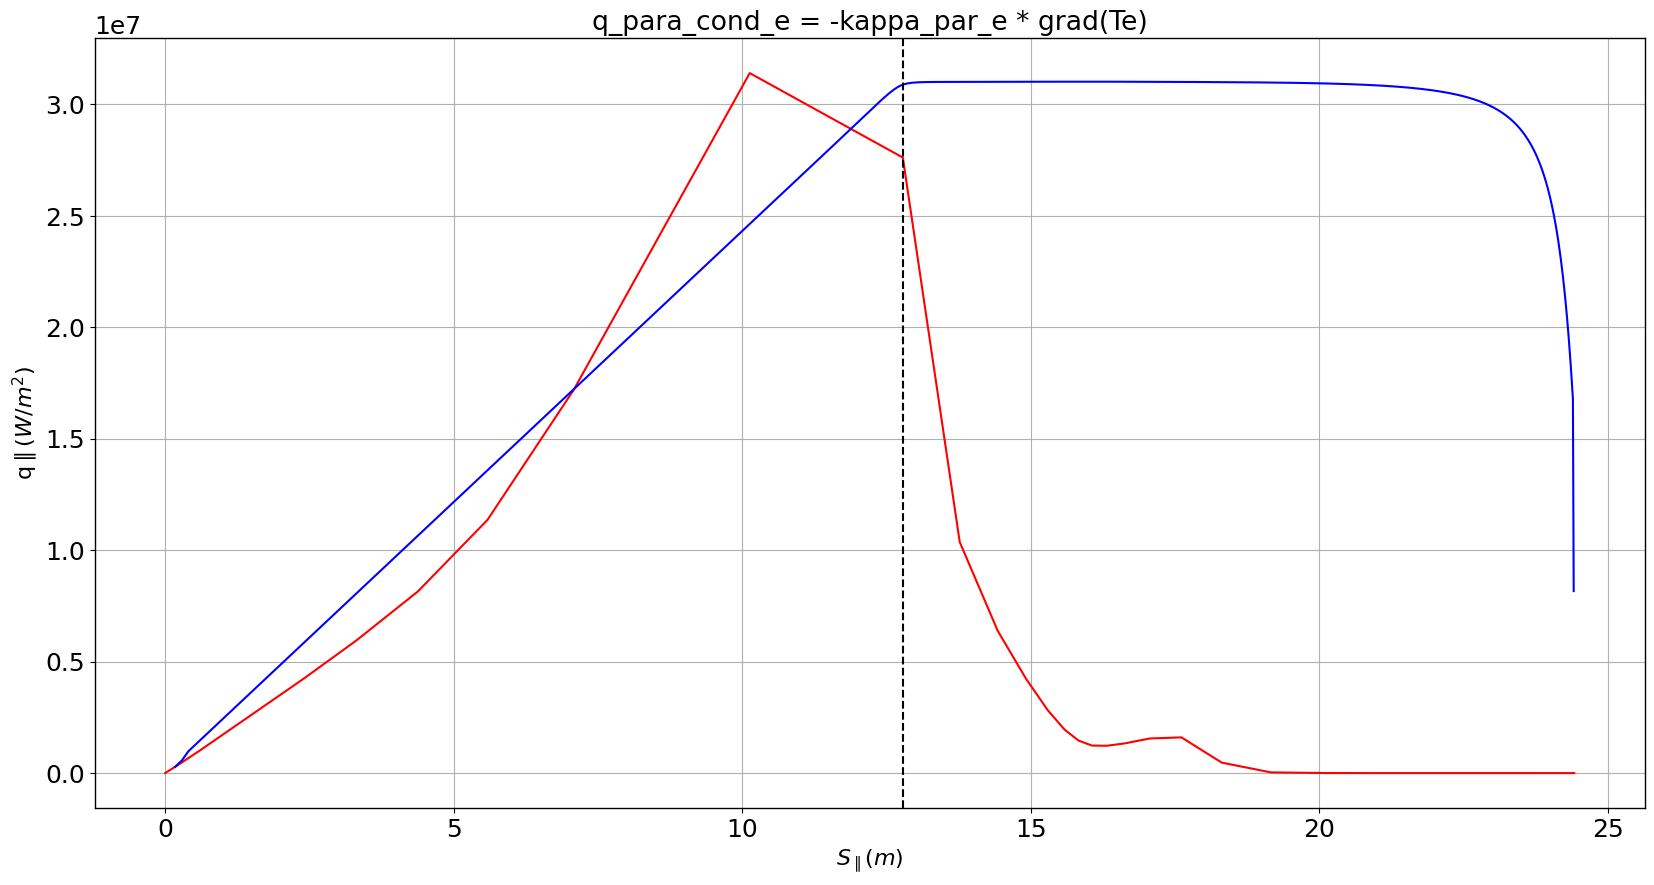

In [ ]:
# Power comparison

kappa_e = replace_guards(np.ravel(ds_1D['kappa_par_e'].isel(t=-1).values))
grad_Te = np.gradient(replace_guards(np.ravel(ds_1D['Te'].isel(t=-1).values)), ds_1D['y'].values[1:-1])

q_1D = -kappa_e*grad_Te


params = ['kappa_par_e', 'Te', ]
# get 1D slice
profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1) 

profile['q_e_para_external'] = - profile['kappa_par_e'] * np.gradient(profile['Te'])

xpoint_location = profile['R'].idxmin()

print('q_cond_e = ', np.max(profile['q_e_para_external']*1e-6), 'MW')
# plot
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# ax2 = ax.twinx()
ax.plot(profile['Spar'], profile['q_e_para_external'], label = '2D', color = 'red')
ax.plot(ds_1D['y'].values[1:-1], q_1D, label = '1D', color = 'blue')
# ax2.plot(profile['Spar'], profile['q_e_para_external'], label = 'external calc')
ax.set_xlabel(r'$S_{\parallel} (m)$')
ax.set_ylabel(fr'q$\parallel (W/m^2)$') 
ax.axvline(x = profile['Spar'][xpoint_location], color = 'black', linestyle = '--')
ax.set_title(r'q_para_cond_e = -kappa_par_e * grad(Te)')




# Flux expansion

Text(0, 0.5, 'J')

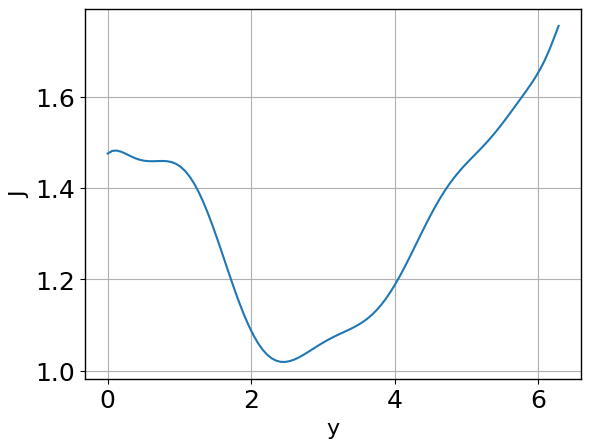

In [ ]:
# Current method
y = np.linspace(0,2*np.pi, 100)

J = ( 0 + y**0*1.475264e+00 + y**1*1.441120e-01 + y**2*-8.954819e-01 + 
    y**3*1.315881e+00 + y**4*9.713666e-02 + y**5*-1.710088e+00 +
    y**6*1.456868e+00 + y**7*-4.767602e-01 + y**8*1.826073e-02 + 
    y**9*2.981313e-02 + y**10*-6.937003e-03 + y**11*-2.031119e-04 + 
    y**12*3.180819e-04 + y**13*-5.560206e-05 + y**14*4.267276e-06 + 
    y**15*-1.279529e-07)




plt.plot(y, J)

plt.xlabel('y')

plt.ylabel('J')


In [ ]:
fl_xh = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Include_flux_expansion/m4ab-tune_albedo_1D_sep_add_1_working_add_flux_expansion')

/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'J' (x: 1, y: 400)>
dask.array<mul, shape=(1, 400), dtype=float64, chunksize=(1, 10), chunktype=numpy.ndarray>
Coordinates:
    dx       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dy       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dz       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
  * x        (x) int64 0
  * y        (y) float64 0.05792 0.1736 0.289 0.4042 ... 24.39 24.4 24.41 24.41
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        IncIntShear = false\t\t# type: bool, source: default\nMXG...
    geometry:       
    units:          m/radian T
    conversion:     0.0010217477552952484
    standard_name:  Jacobian
    long_name:      Jacobian to translate from flux to cylindrical coordinate...
    units_type:     SI


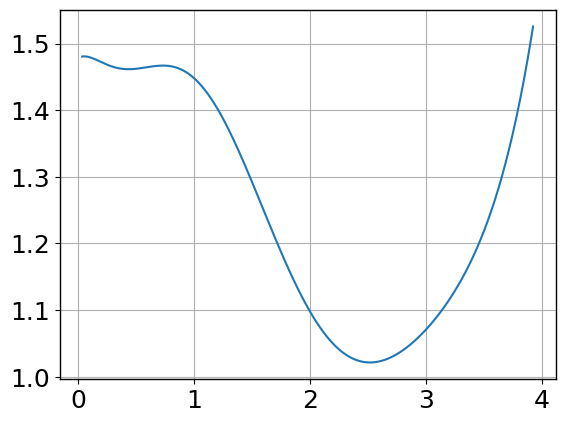

In [ ]:
print(fl_xh['J'])

# conversion = fl_xh['J'].conversion

offset = -150
J = fl_xh['J'][0][2:offset]
y = np.linspace(0,2*np.pi, len(fl_xh['y']))[2:offset]

# print(conversion)

plt.plot(y, J)

# plt.plot(fl_xh['y'][2:-100],fl_xh['J'][0][2:-100])

# 1D/2D particle balance

In [ ]:
print(ds_1D.data_vars)

Data variables:
    Bxy                            (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    Ed+_iz                         (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    Ed+_rec                        (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    Ed+_sheath                     (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    Ed_target_recycle              (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    Edd+_cx                        (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    Ee_sheath                      (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    EnergyFlow_d+_ylow             (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>
    EnergyFlow_e_ylow              (t, x, y, z) float64 dask.array<chunksize=(401, 1, 10, 1), meta=np.ndarray>

In [ ]:
# balance = Balance1D(ds_1D.isel(t=-1))



# 2D data extraction

# Hermes-3 IO

In [ ]:
# Load the case

db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m4ab-tune_albedo_new_branch', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/grids')

case = db.load_case_2D("m4ab-tune_albedo_new_branch", use_squash = True, verbose = True)



- Reading case m4ab-tune_albedo_new_branch
-----------------------
- Looking for squash file
- Squash file found. squash date 01/12/2025, 17:02:45, dmp file date 01/12/2025, 16:40:35

Unnormalising with xHermes


1 None
Parameter dpar not found
Parameter  not found


Text(0.5, 1.0, 'q_para_cond_e = -kappa_par_e * grad(Te)')

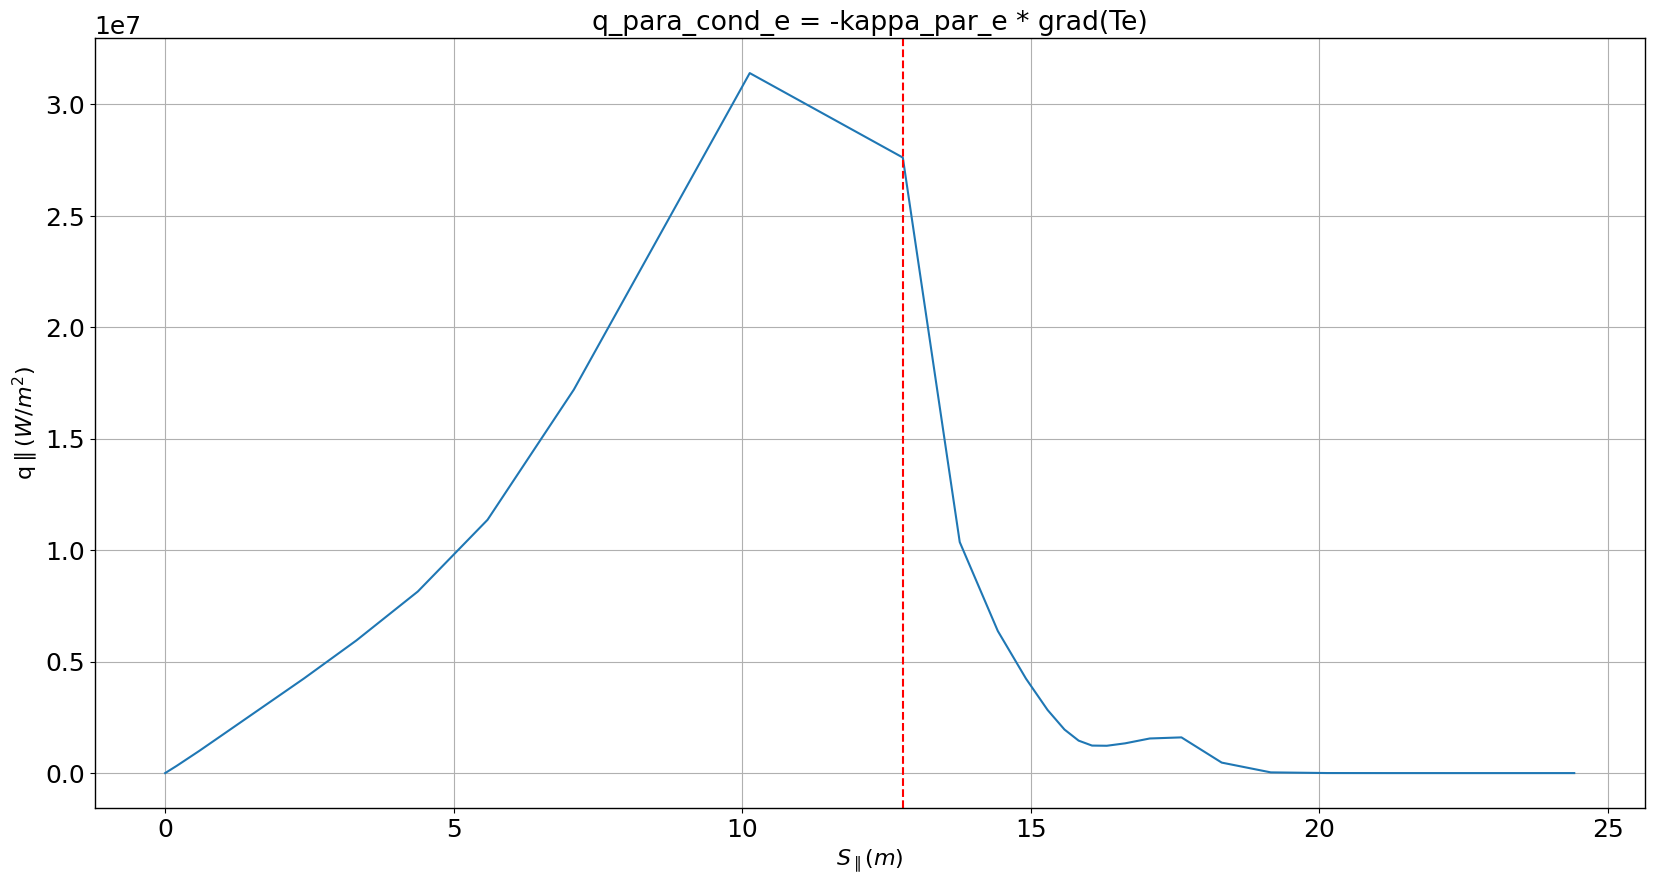

In [ ]:
params = ['Te', 'Ne', 'kappa_par_e', 'efe_tot_xlow', 'Rc', 'pfd+_tot_xlow', 'dy', 'efd+_tot_xlow', 'efe_tot_ylow', 'efd+_tot_ylow', 'dx', 'J', 'g_22', 'dpar', 'dz', 'efe_cond_ylow', '']


# get 1D slice
profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1) 

profile['q_e_para_external'] = - profile['kappa_par_e'] * np.gradient(profile['Te'])

# calculate area andn q_para
area = profile['dx'] * profile['dz'] *profile['J'] / np.sqrt(profile['g_22'])

profile['q_para'] = profile['efe_tot_ylow']/area

profile['q_para_tot'] = (profile['efe_tot_ylow'] + profile['efd+_tot_ylow'])/area

xpoint_location = profile['R'].idxmin()


# plot
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# ax2 = ax.twinx()
ax.plot(profile['Spar'], profile['q_e_para_external'], label = 'internal calc')
# ax2.plot(profile['Spar'], profile['q_e_para_external'], label = 'external calc')
ax.set_xlabel(r'$S_{\parallel} (m)$')
ax.set_ylabel(fr'q$\parallel (W/m^2)$') 
ax.axvline(x = profile['Spar'][xpoint_location], color = 'r', linestyle = '--')
ax.set_title(r'q_para_cond_e = -kappa_par_e * grad(Te)')

Total Rc up to index 11: 648.382587143401
3.139955266095364


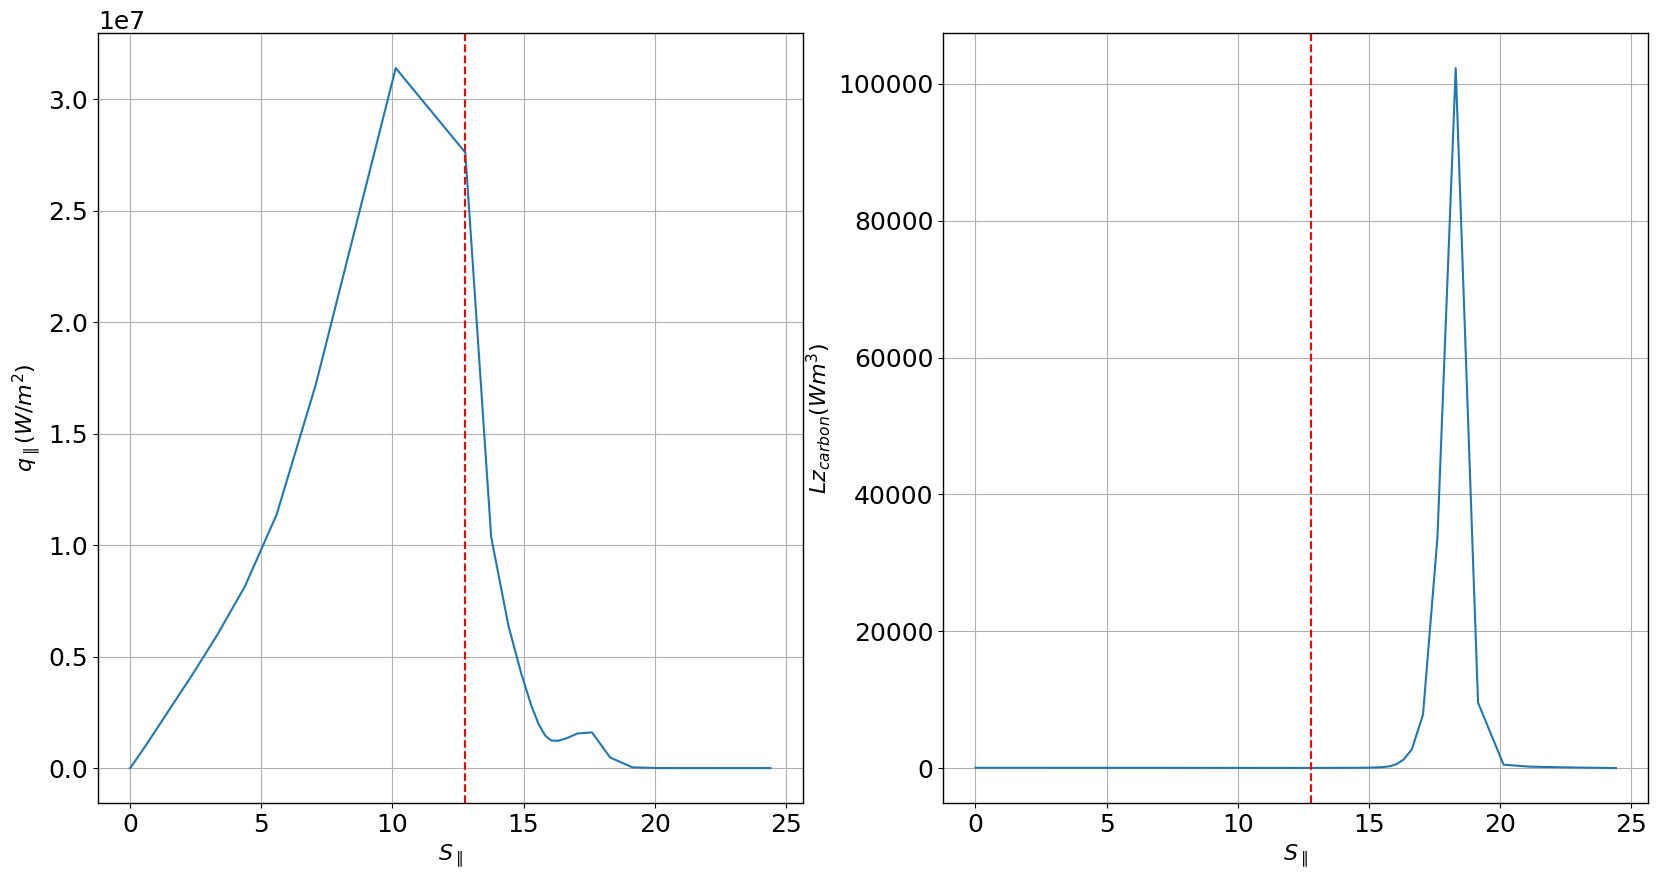

In [ ]:
# print(profile)
profile['q_e_para_external'] = - profile['kappa_par_e'] * np.gradient(profile['Te'])

xpoint_location = profile['R'].idxmin()

total_Rc_up_to_11 = -1 * profile['Rc'][:xpoint_location].sum()
print(f"Total Rc up to index 11: {total_Rc_up_to_11}")

print(profile['q_e_para_external'].max()*1e-7)
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].plot(profile['Spar'], profile['q_e_para_external'])
ax[0].set_xlabel(r'$S_{\parallel}$')
ax[0].set_ylabel(fr'$q_\parallel (W/m^2)$')
ax[0].axvline(x = profile['Spar'][xpoint_location], color = 'r', linestyle = '--')

ax[1].plot(profile['Spar'], -1* profile['Rc'])
ax[1].set_xlabel(r'$S_{\parallel}$')
ax[1].set_ylabel(r'$Lz_{carbon} (Wm^3)$')
ax[1].axvline(x = profile['Spar'][xpoint_location], color = 'r', linestyle = '--')
# ax[1].set_yscale('log')
plt.show()




1.5649191736428076e+18


Text(0, 0.5, '$N_e (m^3)$')

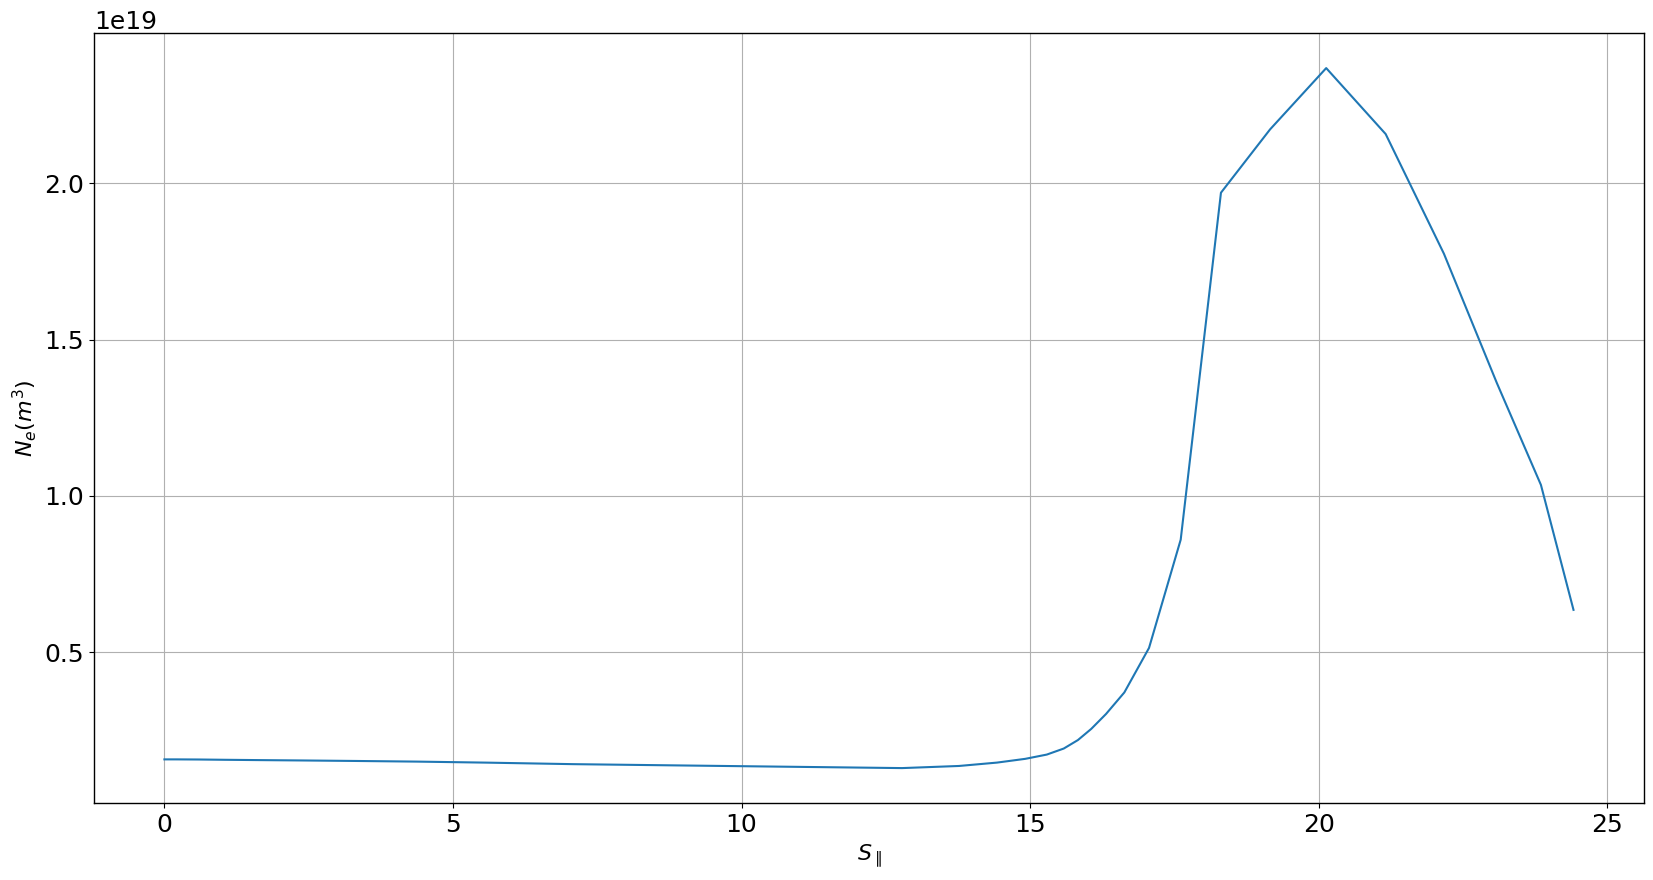

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
print(profile['Ne'][0])

ax.plot(profile['Spar'], profile['Ne'])
ax.set_xlabel(r'$S_{\parallel}$')
ax.set_ylabel(fr'$N_e (m^3)$')

## Flux expansion

In [ ]:
fl_ex_1D = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Include_flux_expansion/m4ab-tune_albedo_1D_sep_add_1_working_add_flux_expansion')



/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


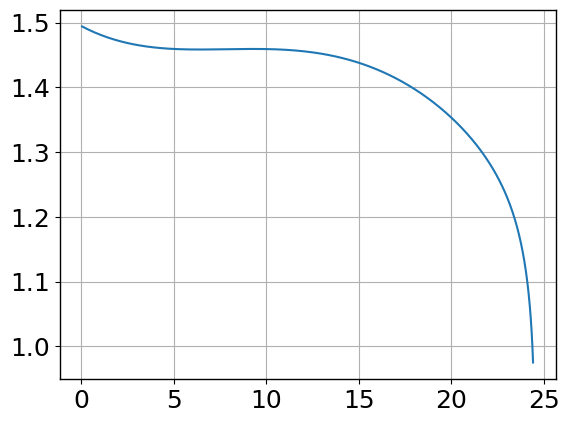

In [ ]:
fl_ex_j = fl_ex_1D['J'][0]
fl_ex_y = fl_ex_1D['y']

plt.plot(fl_ex_y, fl_ex_j)

### corrected fitting routine

1 None


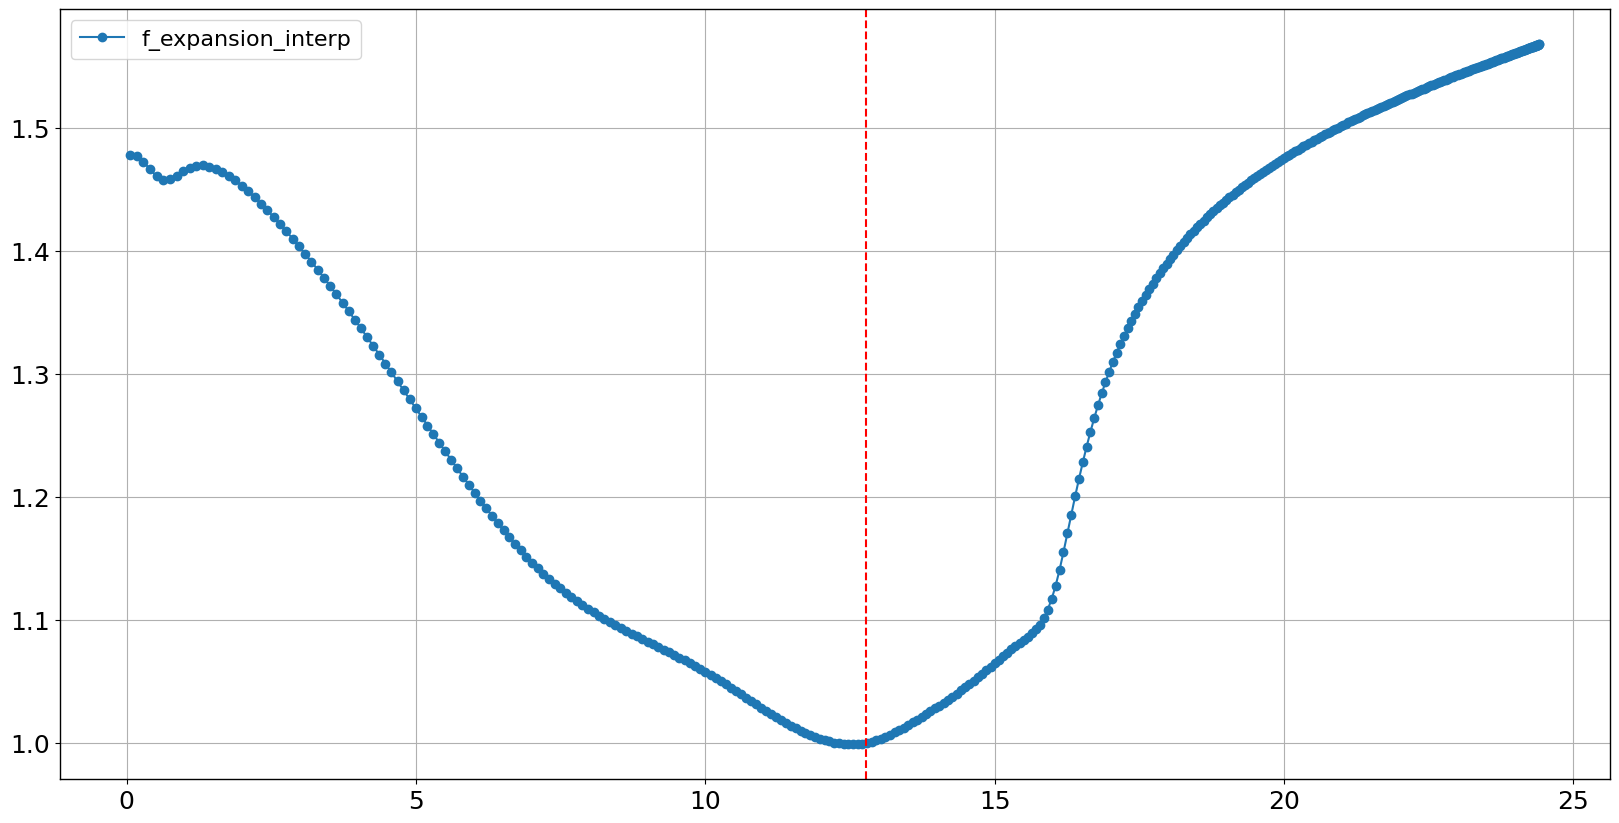

In [ ]:
dymin = 0.1
ny = 400
length = 24.41482754   
y = np.linspace(0, 2*np.pi, ny)
from scipy.interpolate import interp1d

dy = (length / ny) * (1 + (1-dymin)*(1-y/np.pi))


def non_uniform_grid(length, ny, dymin):
    """
    Generate a non-uniform grid with decreasing spacing towards the end.

    Parameters:
    length (float): Total length of the domain.
    ny (int): Number of grid points.
    dymin (float): Minimum relative spacing factor (0 < dymin ≤ 1).

    Returns:
    numpy.ndarray: Array of grid points.
    """
    y = np.linspace(0, np.pi, ny)  # Parameter to control spacing variation
    dy = (length / ny) * (1 + (1 - dymin) * (1 - y / np.pi))  # Non-uniform spacing
    grid = np.cumsum(dy)  # Cumulative sum to get grid positions
    grid -= grid[0]  # Ensure the first grid point is at 0
    grid *= length / grid[-1]  # Normalize to ensure the last grid point is at 'length'
    
    return grid

y = non_uniform_grid(24.41482754, 400, 0.1)


y_herm = fl_xh['y'].values
dy_herm = fl_xh['dy'].values[0]

params = ['R', 'Bxy']
profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1)

xpoint_location = profile['R'].idxmin()
B_xpoint = profile['Bxy'][xpoint_location]

f_expansion = ( -1* profile['Bxy']/B_xpoint ) + 2

x_sparce = profile['Spar']

f = interp1d(x_sparce, f_expansion, kind='cubic')

f_herm = f(y_herm)

fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.plot(y_herm, f_herm, label = 'f_expansion_interp', marker = 'o')
ax.axvline(x = profile['Spar'][xpoint_location], color = 'r', linestyle = '--')
plt.legend()



### Polynomial fitting

Fitted Polynomial Coefficients:
y^0: 1.494753
y^1: -0.112726
y^2: 0.125574
y^3: -0.061533
y^4: 0.013873
y^5: -0.001712
y^6: 0.000123
y^7: -0.000005
y^8: 0.000000
y^9: -0.000000
y^10: 0.000000


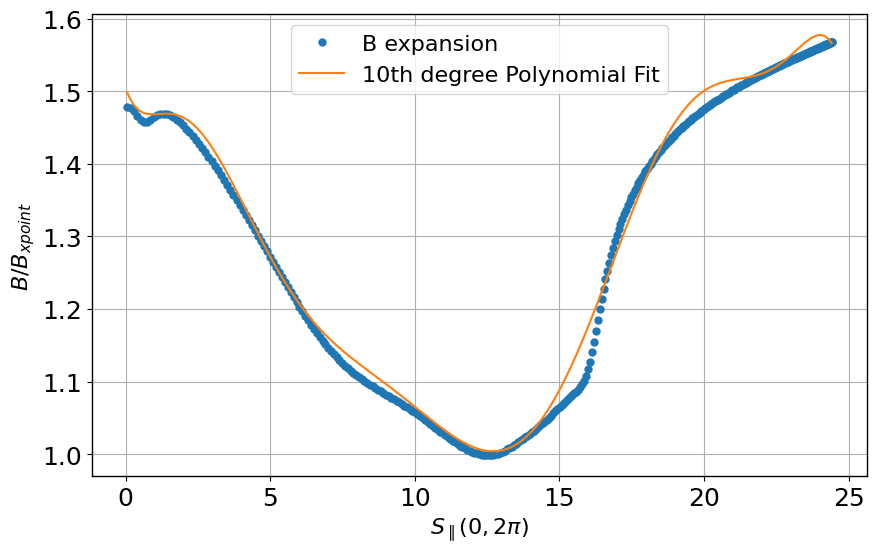

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace these with your actual data


x_data = y_herm  # Add your x values here
y_data = f_herm

# Ensure you have data before proceeding
if len(x_data) == 0 or len(y_data) == 0:
    raise ValueError("Please provide your x_data and y_data arrays.")

# Fit a 10th-degree polynomial
coefficients = np.polyfit(x_data, y_data, 10)

# Generate the polynomial function
polynomial = np.poly1d(coefficients)

# Evaluate the polynomial for plotting
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = polynomial(x_fit)

# Print coefficients
print("Fitted Polynomial Coefficients:")
for i, coef in enumerate(coefficients[::-1]):
    print(f"y^{i}: {coef:.6f}")

# Plot the data and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label="B expansion", markersize=5)
plt.plot(x_fit, y_fit+0.01, '-', label="10th degree Polynomial Fit")
plt.ylabel(r'$B/B_{xpoint}$')
plt.xlabel(r"$S_{\parallel} (0 , 2\pi)$")
plt.legend()
plt.grid(True)
plt.show()


Fitted Polynomial Coefficients:
y^0: 1.476931e+00
y^1: -3.859324e-02
y^2: 5.681232e-02
y^3: -4.002243e-02
y^4: 1.280521e-02
y^5: -2.467254e-03
y^6: 2.988859e-04
y^7: -2.150812e-05
y^8: 7.486199e-07
y^9: -2.432213e-10
y^10: -3.927496e-10
y^11: -3.917000e-11
y^12: 3.023562e-12
y^13: -6.289693e-14
y^14: 1.503982e-19
y^15: 9.695673e-18


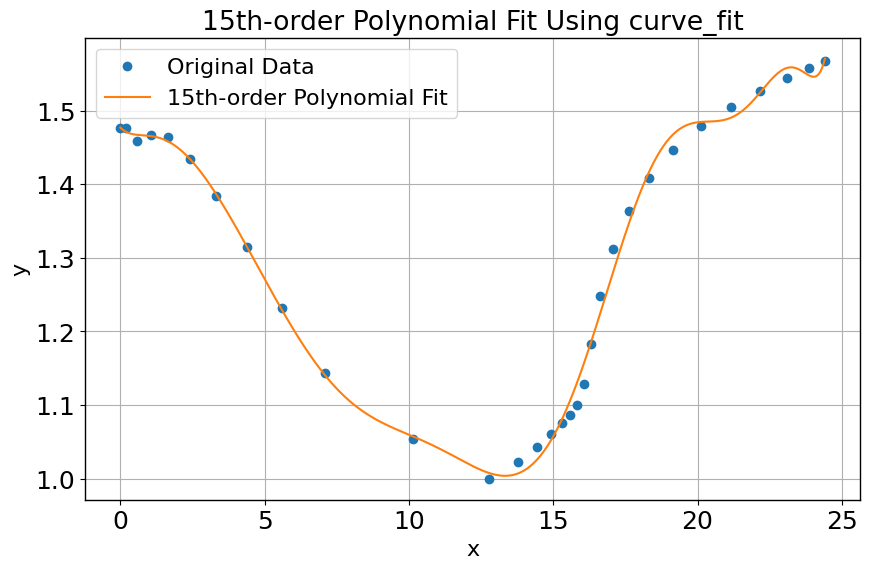

In [ ]:
coef0= 1.476186
coef1= 1.355557
coef2= -14.659815
coef3= 60.751165
coef4= -135.247124
coef5= 185.665523
coef6= -169.207418
coef7= 106.779475
coef8= -47.843161
coef9=15.422419
coef10= -3.585925
coef11= 0.595873
coef12= -0.069006
coef13= 0.005290
coef14= -0.000241
coef15= 0.000005

x_values = np.linspace(0, 2*np.pi, len(profile['Spar']))

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the 15th-order polynomial function
def polynomial_15(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Initial guess for coefficients (all zeros)
initial_guess = np.zeros(16)

# Fit the data using curve_fit
popt, pcov = curve_fit(polynomial_15, x_data, y_data, p0=initial_guess)

# Print the fitted coefficients
print("Fitted Polynomial Coefficients:")
for i, coef in enumerate(popt):
    print(f"y^{i}: {coef:.6e}")

# Define the fitted function
def fitted_function(x):
    return polynomial_15(x, *popt)

# Generate data for plotting
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = fitted_function(x_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label="Original Data")
plt.plot(x_fit, y_fit, '-', label="15th-order Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("15th-order Polynomial Fit Using curve_fit")
plt.legend()
plt.grid(True)
plt.show()



Copy and paste this function definition:
J = 0 + y^0*1.476931e+00 + y^1*-3.859324e-02 + y^2*5.681232e-02 + y^3*-4.002243e-02 + y^4*1.280521e-02 + y^5*-2.467254e-03 + y^6*2.988859e-04 + y^7*-2.150812e-05 + y^8*7.486199e-07 + y^9*-2.432213e-10 + y^10*-3.927496e-10 + y^11*-3.917000e-11 + y^12*3.023562e-12 + y^13*-6.289693e-14 + y^14*1.503982e-19 + y^15*9.695673e-18


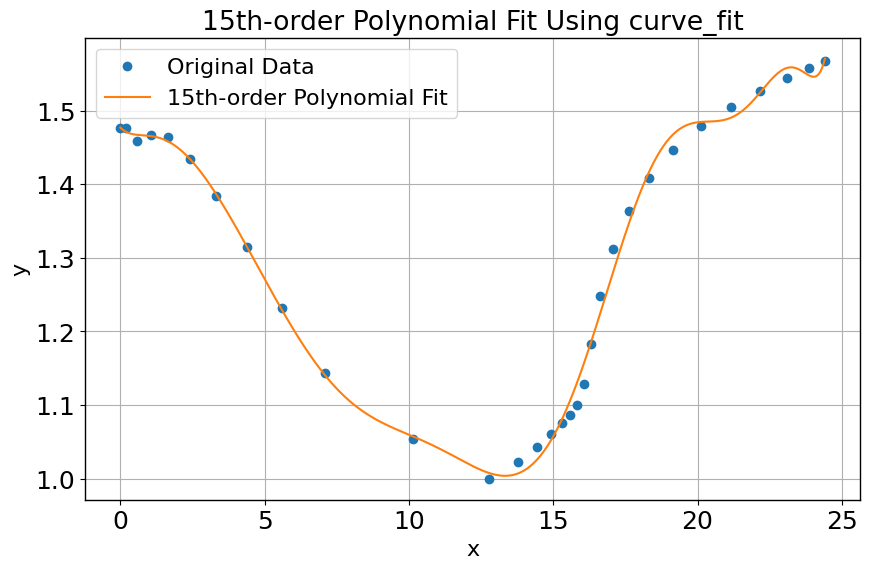

In [ ]:
# Replace these with coefficients from popt
coef0, coef1, coef2, coef3, coef4 = popt[0], popt[1], popt[2], popt[3], popt[4]
coef5, coef6, coef7, coef8, coef9 = popt[5], popt[6], popt[7], popt[8], popt[9]
coef10, coef11, coef12, coef13, coef14, coef15 = popt[10], popt[11], popt[12], popt[13], popt[14], popt[15]

def fitted_function_manual(x):
    return (coef0 + coef1 * x**1 + coef2 * x**2 + coef3 * x**3 +
            coef4 * x**4 + coef5 * x**5 + coef6 * x**6 + coef7 * x**7 +
            coef8 * x**8 + coef9 * x**9 + coef10 * x**10 + coef11 * x**11 +
            coef12 * x**12 + coef13 * x**13 + coef14 * x**14 + coef15 * x**15)

# Print the fitted coefficients in your requested format
print("Copy and paste this function definition:")
formatted_coeffs = " + ".join([f"y^{i}*{coef:.6e}" for i, coef in enumerate(popt)])
print(f"J = 0 + {formatted_coeffs}")

# Define the fitted function dynamically
def fitted_function(x):
    return polynomial_15(x, *popt)

# Generate data for plotting
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = fitted_function(x_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label="Original Data")
plt.plot(x_fit, y_fit, '-', label="15th-order Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("15th-order Polynomial Fit Using curve_fit")
plt.legend()
plt.grid(True)
plt.show()

# Profile plots

1 None
1 None
1 None
1 None


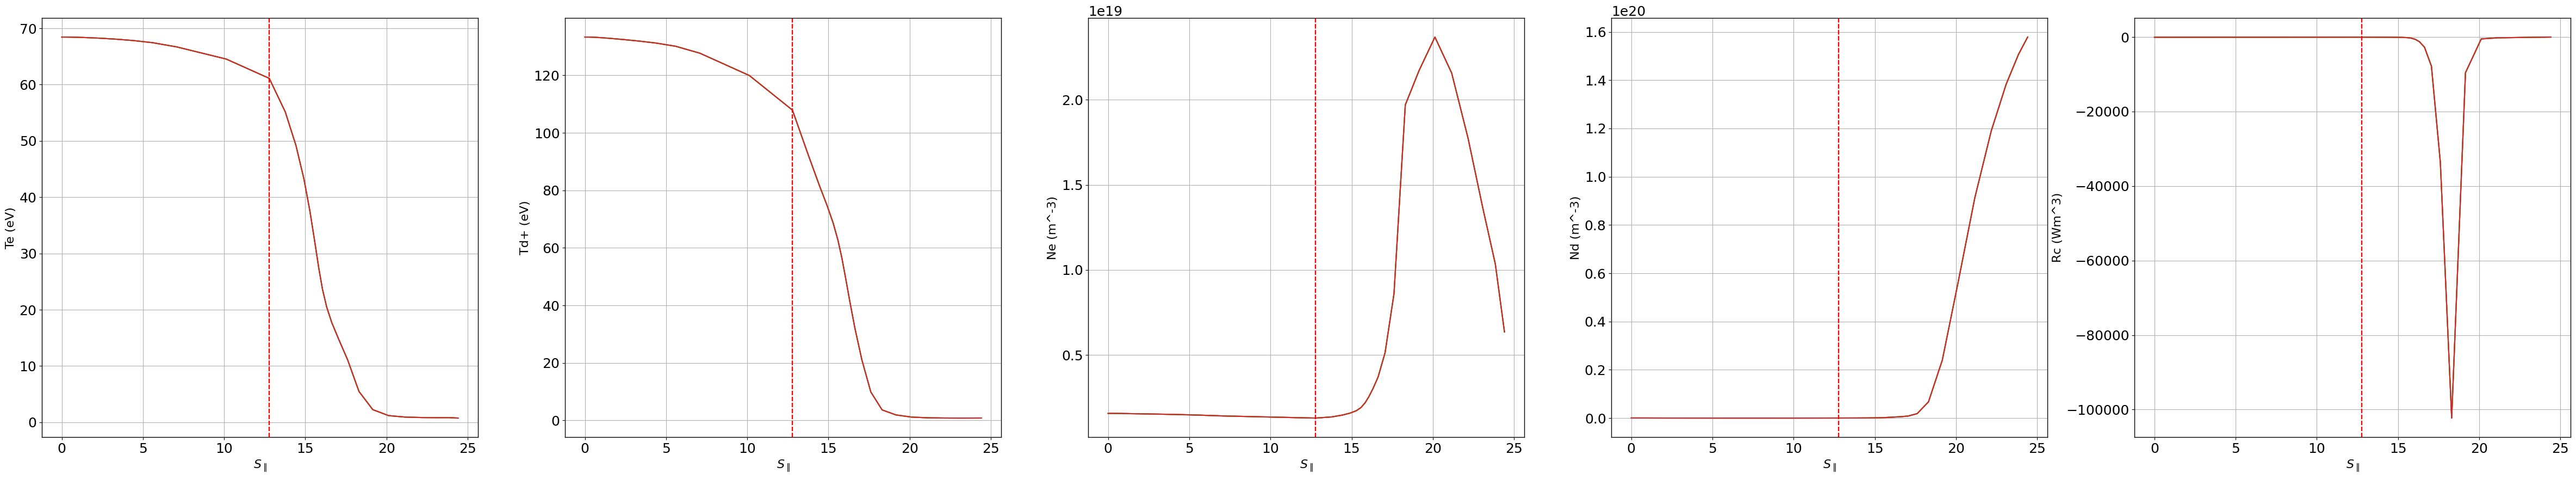

In [ ]:
params = ['Te', 'Td+', 'Ne', 'Nd', 'Rc']
units = ['eV', 'eV', 'm^-3', 'm^-3', 'Wm^3']


fig, ax = plt.subplots(1, len(params), figsize = (len(params)*12, 10))

for j  in range(4):

    profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1)

    xpoint_location = profile['R'].idxmin()


    for i, param in enumerate(params):
        ax[i].plot(profile['Spar'], profile[param])
        ax[i].axvline(x = profile['Spar'][xpoint_location], color = 'r', linestyle = '--')
        ax[i].set_xlabel(r'$S_{\parallel}$')
        ax[i].set_ylabel(f'{param} ({units[i]})')

1 None


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

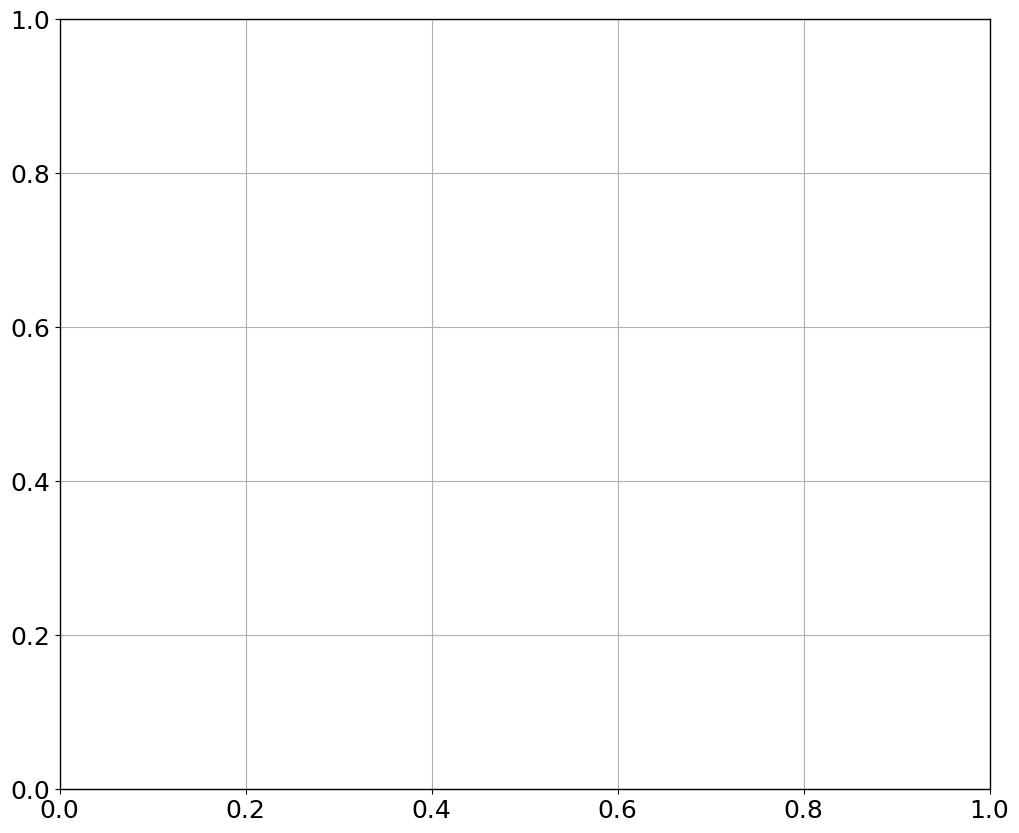

In [ ]:
geom_param = ['R', 'Z']


regions = ['outer_lower', 'outer_upper', 'inner_lower', 'inner_upper']


sep_region = pd.DataFrame()
fig,axis = plt.subplots(1, 1, figsize = (12, 10))
for region in regions:
    profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = geom_param, region = region, sepadd = 1)
    ax.plot(profile['R'], profile['Z'], label = region)



    
# profile_all = get_1d_poloidal_data(case.ds.isel(t=-1), params = geom_param, region = region, sepadd = 1)

profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = geom_param, region = ('outer_lower'), sepadd = 1)


xpoint_location = profile['R'].idxmin()

fig, ax = plt.subplots(1, 1 , figsize = (12, 10))

ax.plot(profile['R'],profile['Z'])
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlabel(r'$R (m)$')
ax.set_ylabel(r'$Z (m)$')

# Mike's case

## I/O

In [ ]:
# Load the case

db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m4ab-tune_albedo', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/grids')

case = db.load_case_2D("m4ab-tune_albedo", use_squash = True, verbose = True)


In [ ]:
params = ['Te', 'Td+', 'Ne', 'Nd', 'Rc']
units = ['eV', 'eV', 'm^-3', 'm^-3', 'Wm^3']

profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1)

xpoint_location = profile['R'].idxmin()

fig, ax = plt.subplots(1, len(params), figsize = (len(params)*12, 10))

for i, param in enumerate(params):
    ax[i].plot(profile['Spar'], profile[param])
    ax[i].axvline(x = profile['Spar'][xpoint_location], color = 'r', linestyle = '--')
    ax[i].set_xlabel(r'$S_{\parallel}$')
    ax[i].set_ylabel(f'{param} ({units[i]})')

# 1D input results

# CVODE initial case, old solver

# 2D profiles

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (30, 10))

vmin = 1
vmax = 1000

case.ds["Te"].isel(t=-1).hermesm.polygon(ax = ax[0], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")
case.ds['Td+'].isel(t=-1).hermesm.polygon(ax = ax[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{i}$ [eV]")
case.ds['Ne'].isel(t=-1).hermesm.polygon(ax = ax[2], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{e}$ [$m^{-3}$]")
case.ds['Nd'].isel(t=-1).hermesm.polygon(ax = ax[3], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{i}$ [$m^{-3}$]")